# Data Wrangling

The objective of this assignment is to clean and reshape a dataset, and calculate summary statistics on binge drinking prevalence and poverty rates in U.S. States.

### Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/CDI.csv", low_memory=False)
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2020,2020,US,United States,BRFSS,Health Status,Recent activity limitation among adults,NaN,Number,Age-adjusted Mean,...,HEA,HEA04,NaN,AGEADJMEAN,SEX,SEXF,NaN,NaN,NaN,NaN
1,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,SEX,SEXM,NaN,NaN,NaN,NaN
2,2015,2019,CA,California,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...",NaN,Number,Number,...,CAN,CAN03,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
4,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...",NaN,Number,Number,...,CAN,CAN05,NaN,NMBR,RACE,WHT,NaN,NaN,NaN,NaN


### Data Selection and Reshaping

1. Select Relevant Columns

In [16]:
# binge drinking

df_binge = df[
    (df["Topic"].str.contains("Alcohol", case=False, na=False)) &
    (df["Question"].str.contains("Binge drinking prevalence among high school students", case=False, na=False))
].copy()

df_binge.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
155,2019,2019,KS,Kansas,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
666,2021,2021,ID,Idaho,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,GRADE,GRD12,NaN,NaN,NaN,NaN
667,2021,2021,ID,Idaho,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1672,2019,2019,NC,North Carolina,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,GRADE,GRD10,NaN,NaN,NaN,NaN
15308,2019,2019,AL,Alabama,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN


In [17]:
# poverty

df_poverty = df[
    (df["Question"].str.contains("Living below 150% of the poverty threshold among all people", case=False, na=False)) &
    (df["DataValueType"].str.contains("Crude Prevalence", case=False, na=False)) &
    (df['Stratification1'] == 'Overall')
].copy()

df_poverty.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
15515,2019,2019,AR,Arkansas,ACS,Social Determinants of Health,Living below 150% of the poverty threshold amo...,NaN,%,Crude Prevalence,...,SDOH,SDH01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
18668,2019,2019,AK,Alaska,ACS,Social Determinants of Health,Living below 150% of the poverty threshold amo...,NaN,%,Crude Prevalence,...,SDOH,SDH01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
21571,2019,2019,AZ,Arizona,ACS,Social Determinants of Health,Living below 150% of the poverty threshold amo...,NaN,%,Crude Prevalence,...,SDOH,SDH01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
26877,2019,2019,AL,Alabama,ACS,Social Determinants of Health,Living below 150% of the poverty threshold amo...,NaN,%,Crude Prevalence,...,SDOH,SDH01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
32066,2019,2019,HI,Hawaii,ACS,Social Determinants of Health,Living below 150% of the poverty threshold amo...,NaN,%,Crude Prevalence,...,SDOH,SDH01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [18]:
# merge two datasets

df_new = pd.concat([df_binge, df_poverty], ignore_index=True)

df_new.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,KS,Kansas,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
1,2021,2021,ID,Idaho,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,GRADE,GRD12,NaN,NaN,NaN,NaN
2,2021,2021,ID,Idaho,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,NC,North Carolina,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,GRADE,GRD10,NaN,NaN,NaN,NaN
4,2019,2019,AL,Alabama,YRBSS,Alcohol,Binge drinking prevalence among high school st...,NaN,%,Crude Prevalence,...,ALC,ALC07,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN


2. Reshape the Data

In [19]:
# select columns
cols = ["YearStart", "LocationDesc", "LocationAbbr", "Topic", "Question", "Stratification1", "DataValue"]
df_new = df_new.loc[:, cols].copy()

# fix value
df_new["DataValue"] = pd.to_numeric(df_new["DataValue"], errors="coerce")

# get indicator
def label (row):
    if row['Topic'] == 'Alcohol':
        if row['Stratification1'] == "Overall":
            return "binge_all"
        elif row['Stratification1'] == "Male":
            return "binge_male"
        elif row['Stratification1'] == "Female":
            return "binge_female"
    elif 'Living below 150% of the poverty threshold' in row['Question']:
        if row['Stratification1'] == "Overall":
            return "poverty"
    return None

df_new.loc[:, 'indicator'] = df_new.apply(label, axis=1)

df_new = df_new.dropna(subset=['indicator'])

df_new.head()

,YearStart,LocationDesc,LocationAbbr,Topic,Question,Stratification1,DataValue,indicator
0,2019,Kansas,KS,Alcohol,Binge drinking prevalence among high school st...,Female,18.6,binge_female
2,2021,Idaho,ID,Alcohol,Binge drinking prevalence among high school st...,Male,9.6,binge_male
4,2019,Alabama,AL,Alcohol,Binge drinking prevalence among high school st...,Male,9.4,binge_male
5,2019,Arizona,AZ,Alcohol,Binge drinking prevalence among high school st...,Overall,14.7,binge_all
7,2019,California,CA,Alcohol,Binge drinking prevalence among high school st...,Male,6.1,binge_male


In [20]:
binge_cleaned = (
    df_new.pivot_table(
        index=["LocationDesc", "LocationAbbr", "YearStart"],
        columns="indicator",
        values="DataValue",
        aggfunc="mean"
    )
    .reset_index()
    .rename_axis(None, axis=1)
    .rename(columns={
        "LocationDesc": "state",
        "LocationAbbr": "stateabb",
        "YearStart": "year"
    })
)

binge_cleaned.head()

,state,stateabb,year,binge_all,binge_female,binge_male,poverty
0,Alabama,AL,2019,10.0,10.5,9.4,25.4
1,Alabama,AL,2021,NaN,NaN,NaN,25.8
2,Alaska,AK,2019,13.1,15.2,10.5,17.7
3,Alaska,AK,2021,NaN,NaN,NaN,16.7
4,Arizona,AZ,2019,14.7,15.8,13.4,21.9


3. Summary of the Cleaned Data

In [21]:
# summary
print(binge_cleaned.shape)
print(binge_cleaned.describe())
print(binge_cleaned.dtypes)
print(binge_cleaned.isnull().sum())

(107, 7)
              year  binge_all  binge_female  binge_male     poverty
count   107.000000  90.000000     90.000000   90.000000  104.000000
mean   2019.990654  11.395556     12.108889   10.608889   20.140385
std       1.004662   2.891868      3.056790    3.120921    4.007457
min    2019.000000   3.600000      3.900000    3.300000   12.000000
25%    2019.000000   9.725000      9.925000    8.425000   16.900000
50%    2019.000000  11.250000     12.050000   10.750000   19.550000
75%    2021.000000  13.275000     14.475000   12.550000   22.225000
max    2021.000000  18.800000     18.600000   19.000000   30.600000
state            object
stateabb         object
year              int64
binge_all       float64
binge_female    float64
binge_male      float64
poverty         float64
dtype: object
state            0
stateabb         0
year             0
binge_all       17
binge_female    17
binge_male      17
poverty          3
dtype: int64


4. Save Cleaned Data

In [22]:
binge_cleaned.to_csv("binge_cleaned.csv", index=False)

## Data Transformation and Analysis

1. Top 10 States for Binge Drinking

In [23]:
latest_year = binge_cleaned["year"].max()

recent_year = binge_cleaned[binge_cleaned["year"] == latest_year]
top10 = recent_year.sort_values(by="binge_all", ascending=False).head(10).copy()

top10

,state,stateabb,year,binge_all,binge_female,binge_male,poverty
54,Montana,MT,2021,16.4,17.6,15.3,19.5
62,New Jersey,NJ,2021,15.2,13.6,16.3,16.0
21,Georgia,GA,2021,14.3,16.6,12.2,22.4
52,Missouri,MO,2021,14.1,15.7,12.7,20.9
70,North Dakota,ND,2021,14.0,14.5,13.6,16.9
11,Colorado,CO,2021,13.8,13.6,14.4,15.8
88,Tennessee,TN,2021,13.4,17.4,9.3,23.0
34,Kansas,KS,2021,13.3,12.0,13.7,20.1
90,Texas,TX,2021,13.2,14.1,12.4,23.3
74,Oklahoma,OK,2021,13.1,14.7,11.7,25.3


2. Annual Growth Rates in Binge Drinking

In [24]:
g = (binge_cleaned
     .dropna(subset=["binge_all"])
     .sort_values(["state","year"])
     .groupby("state", as_index=False))

first_last = g.agg(
    first_year=("year","first"),
    last_year =("year","last"),
    first_val =("binge_all","first"),
    last_val  =("binge_all","last"),
)

# years span and annual growth (percentage per year)
first_last["years_span"] = first_last["last_year"] - first_last["first_year"]
first_last = first_last[first_last["years_span"] > 0].copy()

first_last["annual_growth"] = (
    (first_last["last_val"] - first_last["first_val"]) / first_last["years_span"]
)

# Top 5 increases / decreases
top_increase = first_last.sort_values("annual_growth", ascending=False).head(5)
top_decrease = first_last.sort_values("annual_growth", ascending=True).head(5)

print("Top 5 States with Largest Increases")
display(top_increase)

print("\nTop 5 States with Largest Decreases")
display(top_decrease)


Top 5 States with Largest Increases


,state,first_year,last_year,first_val,last_val,years_span,annual_growth
10,Georgia,2019,2021,6.2,14.3,2,4.05
41,Tennessee,2019,2021,8.8,13.4,2,2.30
42,Texas,2019,2021,11.5,13.2,2,0.85
14,Illinois,2019,2021,10.1,11.6,2,0.75
26,Nebraska,2019,2021,8.2,9.1,2,0.45



Top 5 States with Largest Decreases


,state,first_year,last_year,first_val,last_val,years_span,annual_growth
6,Connecticut,2019,2021,12.9,7.0,2,-2.95
17,Kansas,2019,2021,18.8,13.3,2,-2.75
22,Michigan,2019,2021,11.2,6.8,2,-2.20
13,Idaho,2019,2021,15.9,11.7,2,-2.10
47,West Virginia,2019,2021,16.4,12.2,2,-2.10


3. Data Quality Assessment

In [25]:
binge_cleaned["complete"] = binge_cleaned[
    ["binge_all","binge_female","binge_male","poverty"]
].notna().all(axis=1)

# 2. States + years with missing data
missing_data = binge_cleaned.loc[~binge_cleaned["complete"], ["state","year"]]
print("States with missing data (by year):")
display(missing_data.sort_values(["state","year"]))

States with missing data (by year):


,state,year
1,Alabama,2021
3,Alaska,2021
9,California,2021
14,Delaware,2019
22,Guam,2019
29,Indiana,2019
39,Maine,2019
40,Maine,2021
47,Minnesota,2019
48,Minnesota,2021


In [26]:
# % of complete observations for states
completeness_by_state = (
    binge_cleaned.groupby("state")["complete"]
    .mean().mul(100).round(1)
    .reset_index(name="pct_complete")
)
print("\n% Complete Observations by State:")
display(completeness_by_state.sort_values("pct_complete"))


% Complete Observations by State:


,state,pct_complete
53,Wyoming,0.0
50,Washington,0.0
40,Puerto Rico,0.0
38,Oregon,0.0
52,Wisconsin,0.0
24,Minnesota,0.0
20,Maine,0.0
11,Guam,0.0
15,Indiana,50.0
0,Alabama,50.0


In [27]:
summary_table = binge_cleaned.pivot(index='state', columns='year', values='complete')
summary_table

year,2019,2021
state,,
Alabama,True,False
Alaska,True,False
Arizona,True,True
Arkansas,True,True
California,True,False
Colorado,True,True
Connecticut,True,True
Delaware,False,True
District of Columbia,True,True


4. Visualization

Text(0, 0.5, 'Overall Binge Drinking Rate (%)')

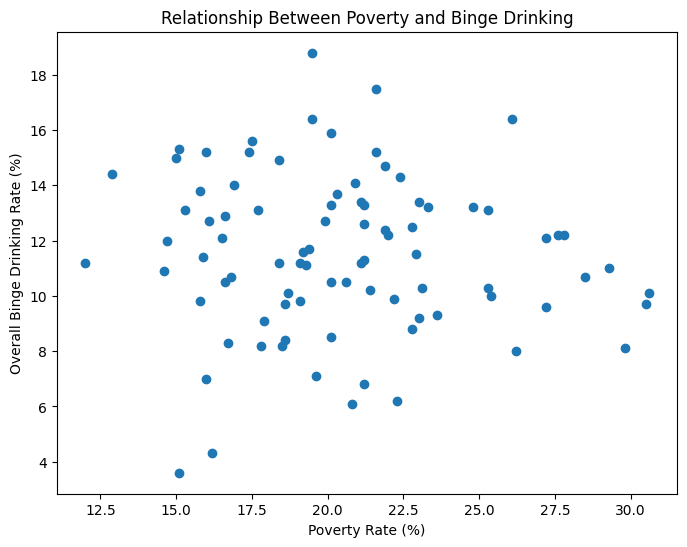

In [28]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(binge_cleaned['poverty'], binge_cleaned['binge_all'])
plt.title('Relationship Between Poverty and Binge Drinking')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Overall Binge Drinking Rate (%)')
